In [130]:
library(lubridate) # For date manipulation
library(dplyr) # dataframe manipulation and grouping summarizing data

# Reading data from the CSV file
# StringsAsFactors = FALSE because lubridate manipulations require date as string
df <- read.csv(file="fenix_call_records.csv",header=TRUE,sep=",",stringsAsFactors = FALSE)

# getting the dimensions of the dataFrame
dim(df)

[1] 32028    14

In [131]:
# investigating the structure of the DataFrame
str(df)

'data.frame':	32028 obs. of  14 variables:
 $ call_id              : int  2807990 2807991 2807992 2807993 2807994 2807995 2807996 2807997 2807998 2807999 ...
 $ destination_person_id: int  86394 86394 212967 114159 86394 77156 239005 114159 212967 114159 ...
 $ source_person_id     : int  269898 320367 129042 372282 366749 255608 354375 191685 245406 354282 ...
 $ account_age          : int  301 122 695 22 44 318 66 506 336 67 ...
 $ account_state        : chr  "In Repayment" "In Repayment" "In Repayment" "In Repayment" ...
 $ occupation           : chr  "Farmer" "Other" "Mechanic / Technician" "Farmer" ...
 $ language             : chr  "Luganda" "Luganda" "Luganda" "Lango" ...
 $ call_direction       : chr  "Incoming" "Incoming" "Incoming" "Incoming" ...
 $ call_duration        : num  0.78 1.93 4.9 3.77 2.62 2.83 1.1 0.75 4.27 0.55 ...
 $ call_outcome         : chr  "Call Resolved" "Call Resolved" "Call Resolved" "Call Resolved" ...
 $ call_start_date      : chr  "2017-10-21 04:02:09

In [132]:
# converting these variables into factors, since the read.csv command turned them into strings
df[, c("account_state","occupation","language","call_direction","call_outcome",
       "call_topics", "call_topic_group")] <- lapply(df[, c("account_state","occupation","language","call_direction",
                                                            "call_outcome","call_topics", "call_topic_group")], factor)

In [133]:
## converting start_date and end_date into to POSIXlt date and time
## POSIXlt is a list of time attributes like hour, minute, seconds, day
df$call_start_date <- as.POSIXlt(df$call_start_date)
df$call_end_date <- as.POSIXlt(df$call_end_date)

In [134]:
# Creating new columns for time of day, day of week
# Because it starts counting from Zero, we add a 1
df$call_hour <- df$call_start_date$hour
df$call_day <- df$call_start_date$wday + 1
df$call_month <- df$call_start_date$mon + 1

In [135]:
# convert day of week into factor and month into factor
# Week begins on Sunday and 2 Months of October and November
df[, c("call_day","call_month")] <- lapply(df[, c("call_day","call_month")], factor)
df$call_day <- factor(df$call_day, levels=c('1','2','3','4','5','6','7'),
  labels=c('Sun','Mon','Tue','Wed','Thur','Fri','Sat'))
df$call_month <- factor(df$call_month, levels=c(10,11), labels=c("Oct", "Nov"))

In [136]:
# View the newly transformed DataFrame
head(df)

call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_start_date,call_end_date,call_topics,call_topic_group,call_hour,call_day,call_month
2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,2017-10-21 04:02:09,2017-10-21 04:01:39,Call Dropped,Other,4,Sat,Oct
2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,2017-10-21 04:04:18,2017-10-21 04:04:09,Code Not Received,Codes,4,Sat,Oct
2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,2017-10-21 04:05:23,2017-10-21 04:05:14,RP Remote Technical,Accessory Technical Issue,4,Sat,Oct
2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,2017-10-21 04:07:24,2017-10-21 04:06:31,Code Not Received,Codes,4,Sat,Oct
2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,2017-10-21 04:07:28,2017-10-21 04:07:20,Code Not Received,Codes,4,Sat,Oct
2807995,77156,255608,318,In Repayment,Mechanic / Technician,Luganda,Incoming,2.83,Call Resolved,2017-10-21 04:07:52,2017-10-21 04:07:13,"Code Entered Late, Code Not Received",Codes,4,Sat,Oct


In [137]:
# Answering the question When do we experience the most traffic
# We group incoming and outgoing calls by hour
# we select by eliminating certain columns in the new grouped dataFrame
subset_df <- select(df, -(call_start_date:call_end_date), -(call_id:language), -(call_duration:call_topic_group))
summary1 <- group_by(subset_df, call_direction, call_hour)
summary1 <- summarize(summary1, no_of_calls=n())
summary1


call_direction,call_hour,no_of_calls
Incoming,4,819
Incoming,5,794
Incoming,6,1189
Incoming,7,1165
Incoming,8,1528
Incoming,9,1462
Incoming,10,1363
Incoming,11,1810
Incoming,12,2134
Incoming,13,1854


The following objects are masked from summary1 (pos = 4):

    call_direction, call_hour, no_of_calls

The following objects are masked from summary1 (pos = 16):

    call_direction, call_hour, no_of_calls



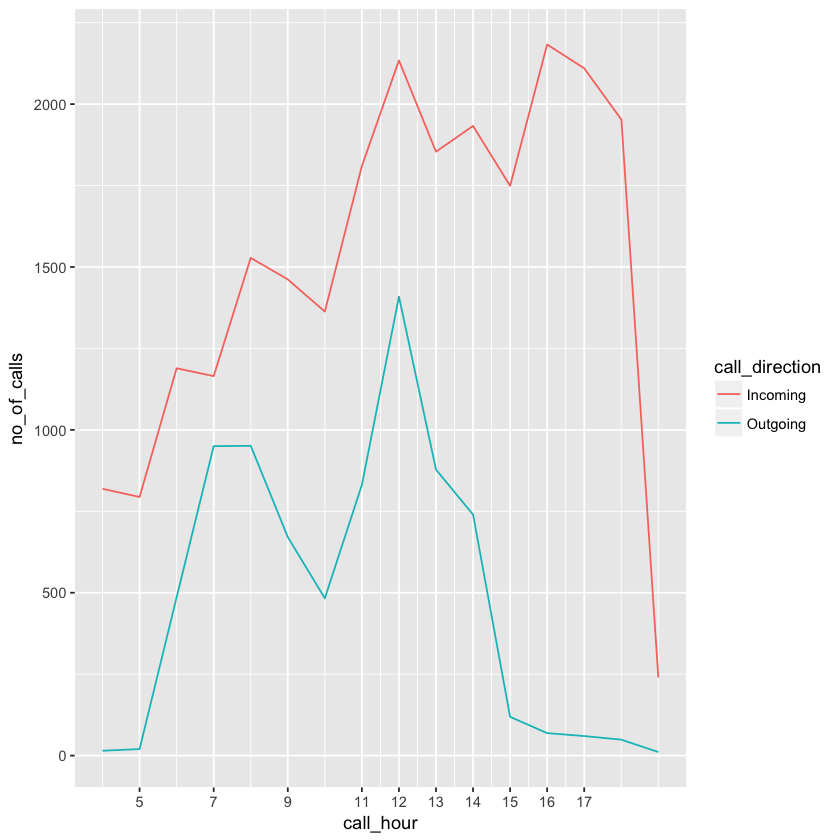

In [138]:
## loading ggplot for plotting graphs
library(ggplot2)
attach(summary1)
## generating a ggplot plot to visualize data
ggplot(data=summary1, aes(x=call_hour, y=no_of_calls, color=call_direction))+ geom_line() + scale_x_continuous(breaks=c(5,7,9, 11,12,13,14,15,16,17,20,21,22,23))

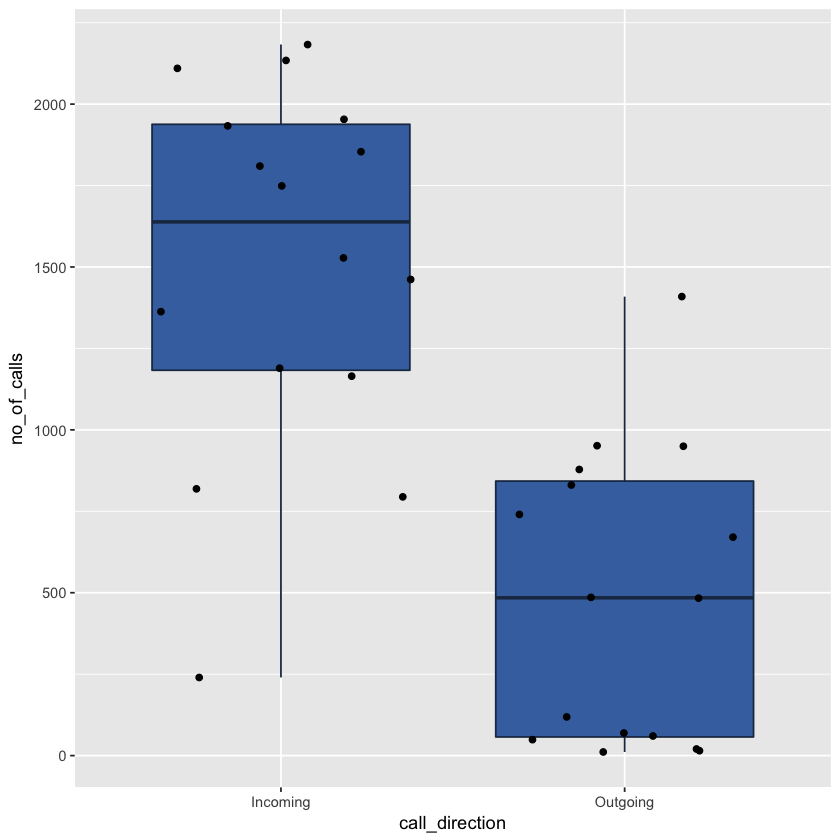

In [139]:
## Boxplot to show distribution and average
fill <- "#4271AE"
line <- "#1F3552"
ggplot(data=summary1, aes(x=call_direction, y=no_of_calls))+ geom_boxplot(fill = fill, color=line ) + geom_jitter()

## Solution to Question 1

From the boxplot, it is clear that the number of Incoming calls is 3 times that of outgoing calls

For the incoming calls, the most traffic is experienced at 16:00hrs. The number of incoming calls rises exponentially from 04:00hrs and peaks at 12:00hrs, thereafter experiencing a decline between 12hrs and 13 hrs, before peaking again at 14hrs and later experiencing a sharp decline during the next 4 hours. Whereas the pattern is similar for both the incoming and outgoing calls, on average the number of incoming calls is higher than the that of the outgoing calls.

## Solution to Question 3

In [140]:
## Retaining the call duration and call topic groups columns
subset_df2 <- select(df, -(call_outcome:call_end_date), -(call_id:call_direction), -(call_day:call_hour), - call_topic_group)
# obtaining the first 5 rows
head(subset_df2)

call_duration,call_topics,call_month
0.78,Call Dropped,Oct
1.93,Code Not Received,Oct
4.90,RP Remote Technical,Oct
3.77,Code Not Received,Oct
2.62,Code Not Received,Oct
2.83,"Code Entered Late, Code Not Received",Oct


In [141]:
# filter to retain 10 day call survey data and completion call survey topics
## obtaining subset of 10 day calls
df3 <- subset_df2[grep("^10 Day Call", subset_df2$call_topics), ]
# Number of 10 Day Call cases
dim(df3)

[1] 1179    3

In [142]:
# mean call duration of 10 Day calls
mean(df3$call_duration)

[1] 4.207676

In [143]:
# Obtaining the subset for the Completions calls
df4 <- subset_df2[grep("^Completions Call", subset_df2$call_topics), ]

# No of Completion Call cases
dim(df4)

[1] 4548    3

In [144]:
# Mean of call duration of 10 day calls
mean(df4$call_duration)

[1] 3.437803

In [145]:
# Wilcox test to test these 2 means if 10 day call is greater than completion calls
wilcox.test(df3$call_duration, df4$call_duration, alternative="greater", paired=FALSE, 
            conf_level=0.95)


	Wilcoxon rank sum test with continuity correction

data:  df3$call_duration and df4$call_duration
W = 2584900, p-value = 0.9713
alternative hypothesis: true location shift is greater than 0


In [146]:
# Test if they two values come from the same distribution
x <- df3$call_duration
y <- df4$call_duration

# x greater than y
print(ks.test(x,y, alternative="greater"))

# x less than y
print(ks.test(x,y, alternative="less"))

Warning message in ks.test(x, y, alternative = "greater"):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D^+ = 0.13845, p-value = 2.583e-16
alternative hypothesis: the CDF of x lies above that of y



Warning message in ks.test(x, y, alternative = "less"):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D^- = 0.13942, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



 Visualizing the CDF curves before we conclude

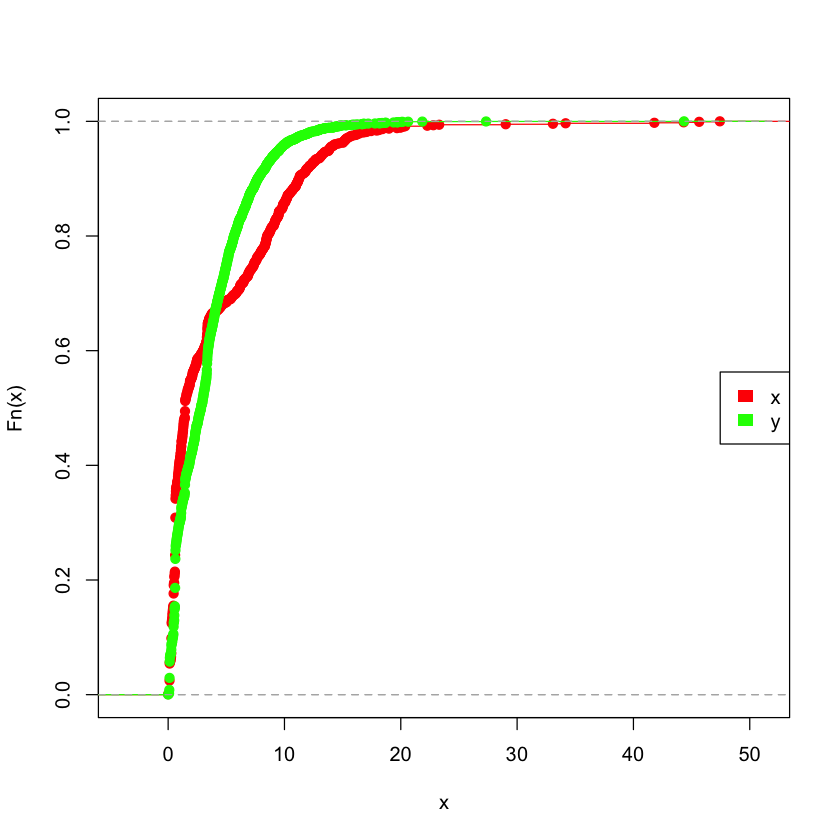

In [147]:
## Plotting ECDFs to visualize the data
# Set colors for the CDF.
aCDFcolor <- rgb(1,0,0)
bCDFcolor <- rgb(0,1,0)


# Create a single chart with all 3 CDF plots.
plot(ecdf(x), col=aCDFcolor, main=NA)
plot(ecdf(y), col=bCDFcolor, add=T)


# Add a legend to the chart.
legend('right', c('x', 'y'), fill=c(aCDFcolor, bCDFcolor), border=NA)

The CDF of X lies both above and below that of Y, therefore we cannot conclusively say that the call durations of 10 Day calls are greater 
than those of Completion calls

In [148]:
wilcox.test(x,y, alt="greater")



	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 2584900, p-value = 0.9713
alternative hypothesis: true location shift is greater than 0


We can not significantly establish that 10 days calls take longer than Completions calls

In [149]:
# Testing the less hypothesis turns out to be significant
wilcox.test(x,y, alt="less")


	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 2584900, p-value = 0.02867
alternative hypothesis: true location shift is less than 0


In [150]:
## Additional Question
table(df$account_state)


   Cancelled     Complete In Repayment    Suspended 
         542         2992        28349          145 

## Other Questions
1. Which days receive the most calls over the period

In [151]:
## Which days receive the most calls by hour by day of week
## calls by day of the week
dow_calls <- df %>% select(call_direction,call_duration,call_day) %>% 
group_by(call_day, call_direction) %>% summarize(no_of_calls=n())

dow_calls

call_day,call_direction,no_of_calls
Sun,Incoming,3544
Sun,Outgoing,1078
Mon,Incoming,3523
Mon,Outgoing,1301
Tue,Incoming,3825
Tue,Outgoing,1192
Wed,Incoming,3678
Wed,Outgoing,1237
Thur,Incoming,3431
Thur,Outgoing,944


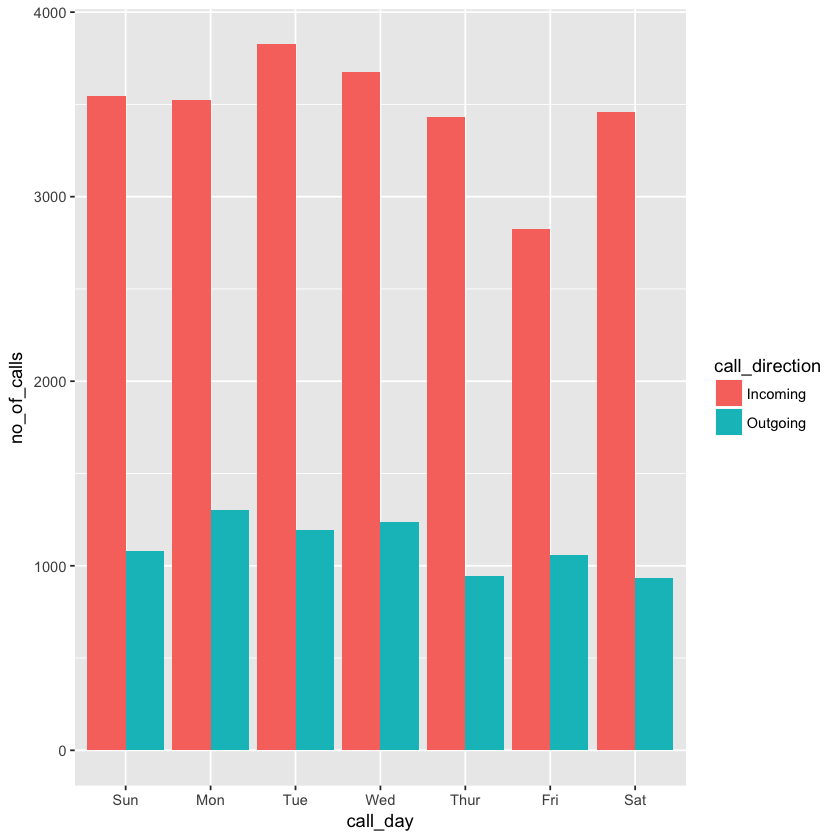

In [152]:
# Visualizing the relationship between Calls and Day of the week
ggplot(dow_calls, aes(x=call_day, y=no_of_calls, fill=call_direction)) +
geom_bar(stat="identity", position="dodge")

## Other Questions
2. Which types of accounts receive the most calls

In [153]:
## Account state by number of calls
## Which days receive the most calls by hour by day of week
## calls by day of the week
acc_calls <- df %>% select(call_direction,account_state) %>% 
group_by(call_direction, account_state) %>% summarize(no_of_calls=n())

acc_calls

call_direction,account_state,no_of_calls
Incoming,Cancelled,443
Incoming,Complete,1791
Incoming,In Repayment,21988
Incoming,Suspended,64
Outgoing,Cancelled,99
Outgoing,Complete,1201
Outgoing,In Repayment,6361
Outgoing,Suspended,81


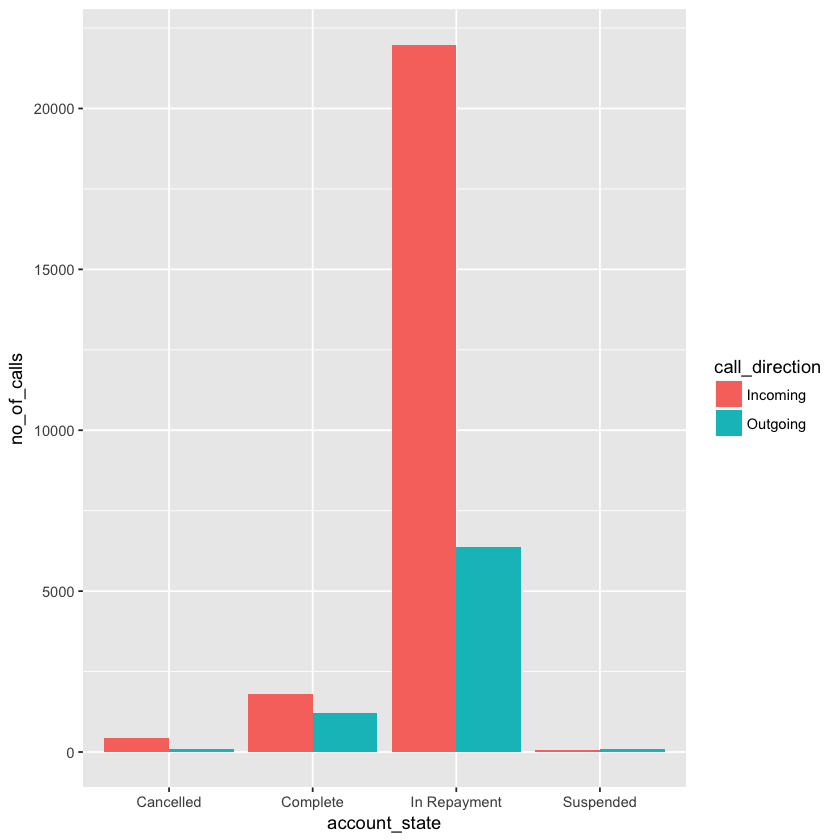

In [154]:
# Visualizing the relationship between Account state and calls
ggplot(acc_calls, aes(x=account_state, y=no_of_calls, fill=call_direction)) +
geom_bar(stat="identity", position="dodge")

Accounts in repayments receive the most calls as described by the bar grapgh above

In [155]:
newDf <- df %>% select(account_age, account_state, call_duration, call_outcome)
newDf <- na.omit(newDf)


In [156]:
# converting account_state and call_outcome to factor 
newDf[, c("account_state","call_outcome")] <- lapply(df[, c("account_state",
                                                        "call_outcome")], factor)
attach(newDf)
str(newDf)


The following objects are masked from newDf (pos = 4):

    account_age, account_state, call_duration, call_outcome

The following objects are masked from newDf (pos = 16):

    account_age, account_state, call_duration, call_outcome



'data.frame':	32028 obs. of  4 variables:
 $ account_age  : int  301 122 695 22 44 318 66 506 336 67 ...
 $ account_state: Factor w/ 4 levels "Cancelled","Complete",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ call_duration: num  0.78 1.93 4.9 3.77 2.62 2.83 1.1 0.75 4.27 0.55 ...
 $ call_outcome : Factor w/ 12 levels "Call Resolved",..: 1 1 1 1 1 1 1 1 1 1 ...


In [157]:
set.seed(1234)
# sample a 1 or 2 as many times with 70% in 1s and 30% in 2s
ind <- sample(2, nrow(newDf), replace=TRUE, prob=c(0.7,0.3))
# 70% for training and 30% for testing
trainData <- newDf[ind==1,]
testData <- newDf[ind==2,]

In [158]:
library(party)
myFormula <- account_state ~ account_age + account_state + call_outcome
call_ctree <- ctree(myFormula, data=trainData)

In [159]:
table(predict(call_ctree), trainData$account_state)

              
               Cancelled Complete In Repayment Suspended
  Cancelled          380        0            0         0
  Complete             0     2091            0         0
  In Repayment         0        0        19854        30
  Suspended            0        0            0        72

In [160]:
testPred <- predict(call_ctree, newdata=testData)
table(testPred, testData$account_state)

              
testPred       Cancelled Complete In Repayment Suspended
  Cancelled          162        0            0         0
  Complete             0      901            0         0
  In Repayment         0        0         8495        23
  Suspended            0        0            0        20

## Other Question
3. What are the major call topics discussed?

In [161]:
## outgoing by topic
newDf1 <- df %>% select(account_age, call_direction,
                       account_state, call_duration, call_outcome,
                       call_topic_group) %>% filter(call_direction=="Incoming" && account_state=="In Repayment")

head(newDf1)

account_age,call_direction,account_state,call_duration,call_outcome,call_topic_group
301,Incoming,In Repayment,0.78,Call Resolved,Other
122,Incoming,In Repayment,1.93,Call Resolved,Codes
695,Incoming,In Repayment,4.90,Call Resolved,Accessory Technical Issue
22,Incoming,In Repayment,3.77,Call Resolved,Codes
44,Incoming,In Repayment,2.62,Call Resolved,Codes
318,Incoming,In Repayment,2.83,Call Resolved,Codes


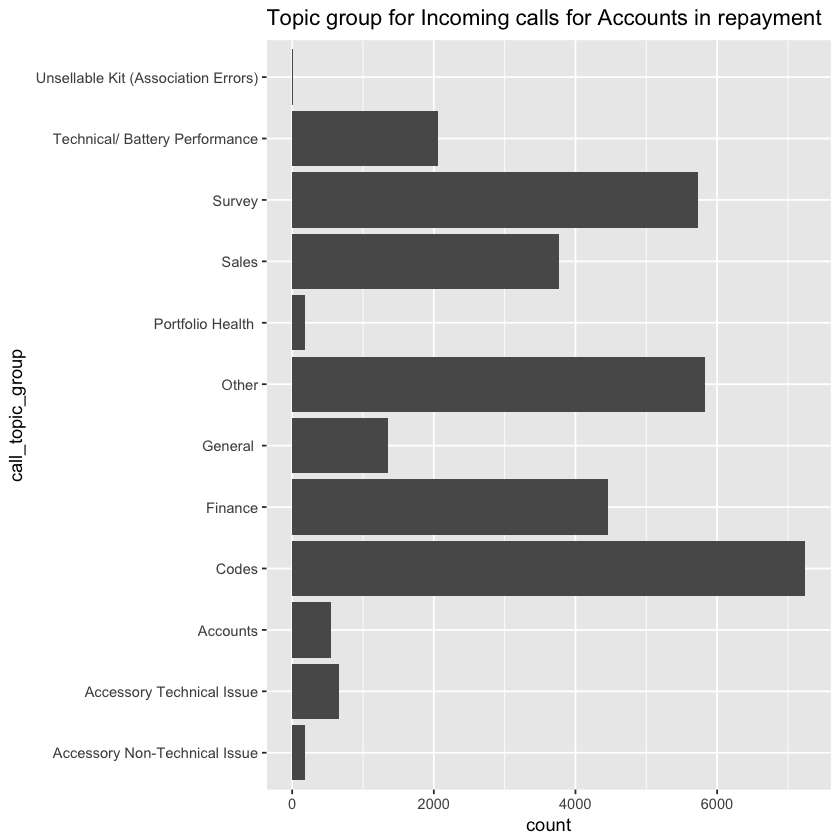

In [162]:
# Visualizing the relationship between Account state and calls continued
## Call topic group by Incoming call
g <- ggplot(newDf1, aes(call_topic_group))
g + geom_bar(position = position_stack(reverse = TRUE)) + coord_flip() +
ggtitle ("Topic group for Incoming calls for Accounts in repayment")

Most incoming calls are about Codes. This is about over 1000 more calls than Others category and Surverys

In [163]:
newDf2 <- df %>% select(account_age, call_direction,
                       account_state, call_duration, call_outcome,
                       call_topic_group) %>% filter(call_direction=="Outgoing" &
                                                   account_state=="In Repayment")
head(newDf2)

account_age,call_direction,account_state,call_duration,call_outcome,call_topic_group
97,Outgoing,In Repayment,3.77,Call Resolved,Other
65,Outgoing,In Repayment,0.82,Call Resolved,Other
34,Outgoing,In Repayment,0.62,Customer Unreachable,Survey
206,Outgoing,In Repayment,4.30,Call Resolved,General
18,Outgoing,In Repayment,0.63,Customer Unreachable,Survey
18,Outgoing,In Repayment,0.62,Customer Unreachable,Survey


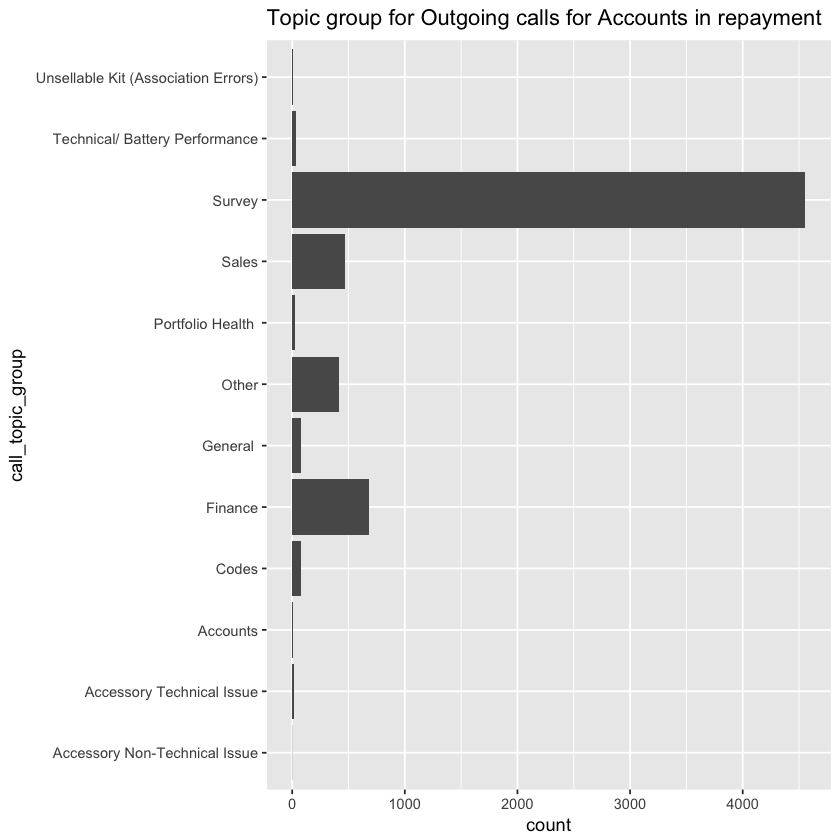

In [164]:
g <- ggplot(newDf2, aes(call_topic_group))
g + geom_bar(position = position_stack(reverse = TRUE)) + coord_flip() +
ggtitle ("Topic group for Outgoing calls for Accounts in repayment")

Most outgoing calls for accounts in repayment are about Surveys

## Call duration by language

In [200]:
# summary statistics for call duration
summary(df$call_duration)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-25150000         2         4     -1568         6        58 

We observe some negative durations which we shall need to get rid of because it is questionable data

In [211]:
# we eliminate the negative durations and summarize the data
# we generate mean duration of call by language of the call
langdf <- df %>% select(call_duration, language) %>% 
filter(call_duration >= 0) %>% group_by(language) %>%
summarize(Mean_duration=mean(call_duration, na.rm=TRUE))

langdf <- arrange(langdf, desc(Mean_duration)) %>% filter(language != "")
langdf

language,Mean_duration
Ng'akarimojong,8.350000
Lubwiisi,6.425000
Ma'di,5.759535
Lusoga,5.527144
Lugwere,5.516651
Lunyankore,5.294599
Karamojong,5.217059
Luganda,5.212959
Rukiga,5.062620
Lumasaba,4.899311


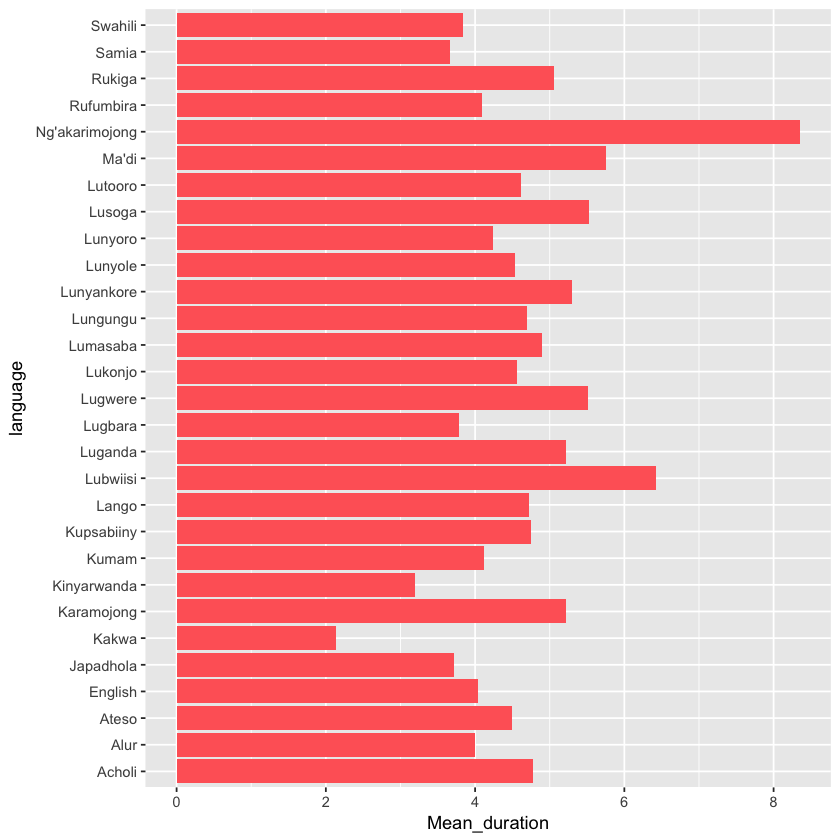

In [216]:
## graphing mean duration of call by language
ggplot(langdf, aes(language,Mean_duration)) + geom_col(fill = "#FF6666") +  coord_flip()

Nga'Karimonjong language takes the longest average call duration according to the descriptive bar graph